In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import sys
sys.path.append('../common')

In [2]:
# define global variables
test_size = 0.2
random_state = 42

In [3]:
# Read the dataset
dataset = pd.read_csv('../Data/data.csv')
dataset.head(10)

,Id,Length,Width,Type
0,1,21.353462,17.489515,0
1,2,19.777907,20.954282,0
2,3,21.959486,22.399416,0
3,4,16.237031,17.155274,0
4,5,21.547234,23.214418,0
5,6,16.651716,15.504583,0
6,7,23.233582,19.005026,0
7,8,21.018607,23.798118,0
8,9,20.893276,19.365433,0
9,10,19.054253,19.517992,0


In [4]:
# We will not use Id as part of classification
dataset = dataset.drop(['Id'], axis = 1)
dataset.head(10)

,Length,Width,Type
0,21.353462,17.489515,0
1,19.777907,20.954282,0
2,21.959486,22.399416,0
3,16.237031,17.155274,0
4,21.547234,23.214418,0
5,16.651716,15.504583,0
6,23.233582,19.005026,0
7,21.018607,23.798118,0
8,20.893276,19.365433,0
9,19.054253,19.517992,0


In [5]:
X = dataset.iloc[:, :-1].values
Y = dataset.iloc[:, -1].values

In [6]:
# Split into training and test sets
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = test_size, random_state = random_state)

In [7]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import GradientBoostingClassifier
from commonfunctions import print_classification_results, plot_classification_summary

classifier = GradientBoostingClassifier(max_depth=1, random_state = random_state)

In [8]:
classifier.fit(X_train,Y_train)

GradientBoostingClassifier(criterion='friedman_mse', init=None,
              learning_rate=0.1, loss='deviance', max_depth=1,
              max_features=None, max_leaf_nodes=None,
              min_impurity_decrease=0.0, min_impurity_split=None,
              min_samples_leaf=1, min_samples_split=2,
              min_weight_fraction_leaf=0.0, n_estimators=100,
              presort='auto', random_state=42, subsample=1.0, verbose=0,
              warm_start=False)

Confusion Matrix:
 [[139  19]
 [ 13 229]]
Accuracy score: 0.92
Classification Report:
              precision    recall  f1-score   support

          0       0.91      0.88      0.90       158
          1       0.92      0.95      0.93       242

avg / total       0.92      0.92      0.92       400

Confusion Matrix:
 [[34  8]
 [ 5 53]]
Accuracy score: 0.87
Classification Report:
              precision    recall  f1-score   support

          0       0.87      0.81      0.84        42
          1       0.87      0.91      0.89        58

avg / total       0.87      0.87      0.87       100



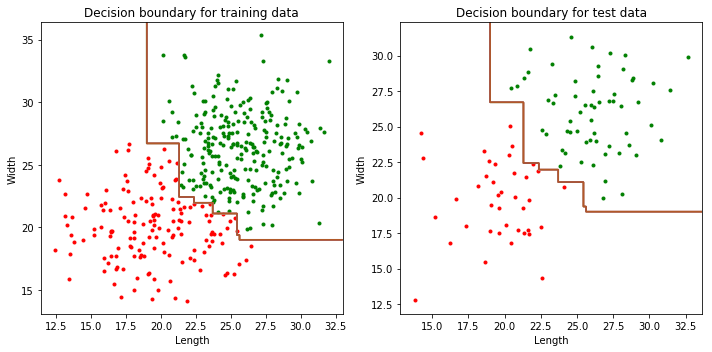

In [9]:
print_classification_results(Y_train, classifier.predict(X_train))
print_classification_results(Y_test, classifier.predict(X_test))
plot_classification_summary(X_train, classifier.predict(X_train), X_test, classifier.predict(X_test), classifier, plt)

In [12]:
from sklearn.tree import export_graphviz
import graphviz 


graphs = []
for i in range(0,5):
    regressor = classifier.estimators_[i][0] # Getting the individual tree
    
    # Print the classification results   
    dot_data = export_graphviz(regressor, out_file=None,
                                    feature_names=['Length', 'Width'],
                                    class_names=['Normal', 'Premium'],
                                    filled=True, rounded=True)
 
    graph = graphviz.Source(dot_data, format='png')    
    graph.render("Gradient" + (str)(i))
    graphs.append(("Gradient" + (str)(i) + ".png", classifier.train_score_[i]))
        

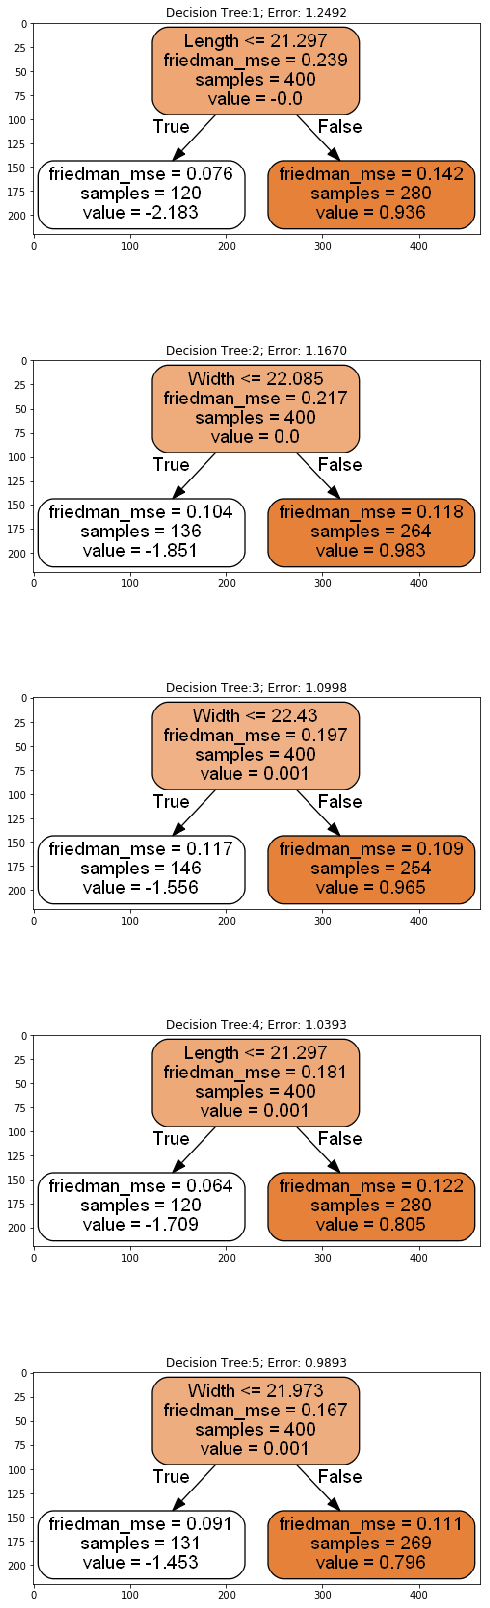

In [15]:
import matplotlib.image as image

fig = plt.figure(figsize=(8, 30))

i = 0
for graph in graphs:
    image_name, error = graph
    fig.add_subplot(5,1,i+1)
    im = image.imread(image_name)
    plt.title("Decision Tree:" + (str)(i + 1) + "; Error: " + "{:6.4f}".format(error))
    plt.imshow(im)
    i = i + 1

plt.show()                         

Confusion Matrix:
 [[143  15]
 [  9 233]]
Accuracy score: 0.94
Classification Report:
              precision    recall  f1-score   support

          0       0.94      0.91      0.92       158
          1       0.94      0.96      0.95       242

avg / total       0.94      0.94      0.94       400

Confusion Matrix:
 [[34  8]
 [ 5 53]]
Accuracy score: 0.87
Classification Report:
              precision    recall  f1-score   support

          0       0.87      0.81      0.84        42
          1       0.87      0.91      0.89        58

avg / total       0.87      0.87      0.87       100



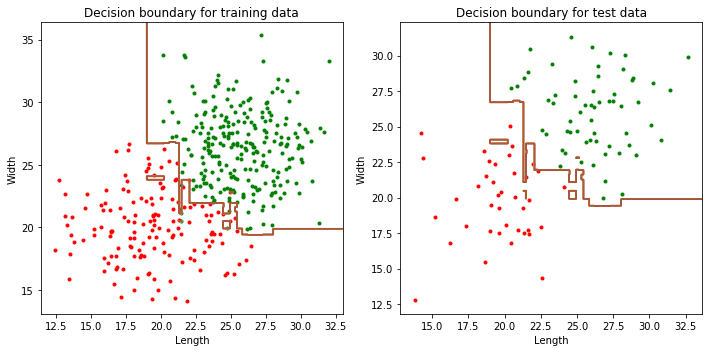

In [17]:
# XG Boost
from xgboost import XGBClassifier
classifier = XGBClassifier(random_state = random_state)
classifier.fit(X_train,Y_train)
print_classification_results(Y_train, classifier.predict(X_train))
print_classification_results(Y_test, classifier.predict(X_test))
plot_classification_summary(X_train, classifier.predict(X_train), X_test, classifier.predict(X_test), classifier, plt)